<a href="https://colab.research.google.com/github/from-iqwerty-import-IQ/Deep_Learning_Projects/blob/main/Mask%20Protocal%20Violation%20/mask_violation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from sklearn.preprocessing import LabelBinarizer

In [30]:
training_dir = '/content/drive/Othercomputers/My Computer (2)/complete dataset/train'
validate_dir = '/content/drive/Othercomputers/My Computer (2)/complete dataset/validate'

In [5]:
training_with_mask_dir = os.path.join(training_dir,'with mask')
training_without_mask_dir = os.path.join(training_dir,'without mask')
training_improper_mask_dir = os.path.join(training_dir,'improper mask')

test_with_mask_dir = os.path.join(validate_dir,'with mask')
test_without_mask_dir = os.path.join(validate_dir,'without mask')
test_improper_mask_dir = os.path.join(validate_dir,'Improper mask')

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical',
    subset='training',
    seed=7

)

test_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical',
    subset='validation',
    
)

Found 12582 images belonging to 3 classes.
Found 3143 images belonging to 3 classes.


In [35]:

convo_base = ResNet50(weights='imagenet',
                   include_top=False,
                   input_shape=(224,224,3),
                   classes = 3
                   )

In [36]:

model = models.Sequential()

In [37]:
model.add(convo_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

#model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [38]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_1 (Dropout)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               12845184  
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 36,433,283
Trainable params: 36,380,163
Non-trainable params: 53,120
_________________________________________________________________


In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              metrics = ['acc'],
               loss=tf.keras.losses.CategoricalCrossentropy())


In [16]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath="/content/transfer_l_mode.h5",
                                         monitor="val_acc",
                                         mode="max",
                                         save_best_only=True,)

In [40]:
trained_model = model.fit(
    train_genrator,
    validation_data= test_genrator,
    epochs = 10,
    #steps_per_epoch=100,
    #validation_steps=33,
    #callbacks = [check_point]
    )

Epoch 1/10
630/630 [==============================] - 359s 562ms/step - loss: 0.5733 - acc: 0.8960 - val_loss: 4.2410 - val_acc: 0.2708
Epoch 2/10
630/630 [==============================] - 347s 551ms/step - loss: 0.5607 - acc: 0.8791 - val_loss: 0.4007 - val_acc: 0.8832
Epoch 3/10
630/630 [==============================] - 348s 552ms/step - loss: 0.1694 - acc: 0.9467 - val_loss: 0.1028 - val_acc: 0.9669
Epoch 4/10
630/630 [==============================] - 346s 549ms/step - loss: 0.1371 - acc: 0.9558 - val_loss: 0.1298 - val_acc: 0.9596
Epoch 5/10
630/630 [==============================] - 348s 553ms/step - loss: 0.1050 - acc: 0.9649 - val_loss: 0.1640 - val_acc: 0.9504
Epoch 6/10
630/630 [==============================] - 342s 542ms/step - loss: 0.1407 - acc: 0.9582 - val_loss: 0.3524 - val_acc: 0.9386
Epoch 7/10
630/630 [==============================] - 344s 546ms/step - loss: 0.1016 - acc: 0.9687 - val_loss: 0.1658 - val_acc: 0.9373
Epoch 8/10
630/630 [============================

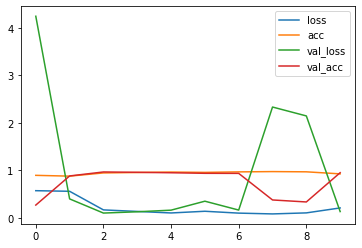

In [41]:
pd.DataFrame(trained_model.history).plot()

In [42]:
model.evaluate(test_genrator)

158/158 [==============================] - 70s 442ms/step - loss: 0.1282 - acc: 0.9561


[0.12824402749538422, 0.956092894077301]

In [43]:
model.save("/content/mask_detection_96k.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [93]:
!wget 'https://www.click2houston.com/resizer/ef42100034hKbFFiXWoLiBAx9Jw=/800x450/smart/filters:format(jpeg):strip_exif(true):strip_icc(true):no_upscale(true):quality(65)/d1vhqlrjc8h82r.cloudfront.net/06-20-2019/t_cb2957c3e55642f8be67ade5e3c9aed7_name_djJ8MjAzMTA4MXxJxEQrqbuOeS3WeV_i8170YyrdllSz_YNc_8bKrwT3wWyoSckW92b_iw_uRePVpRchAqN3ccavPBdpFgQI2YdCXo10ctPUUZHGN6WYTCtXJYu8H5Jyx5ABuagWjzYpH19VeDeAHa_NpIRAHSbZuEGoKw8MTqHVFxMxZrsw31ztp2Pyh1dAZQm806HN3wwYuAiRVireIXvasRVHi03NUUPH'

The name is too long, 268 chars total.
Trying to shorten...
New name is t_cb2957c3e55642f8be67ade5e3c9aed7_name_djJ8MjAzMTA4MXxJxEQrqbuOeS3WeV_i8170YyrdllSz_YNc_8bKrwT3wWyoSckW92b_iw_uRePVpRchAqN3ccavPBdpFgQI2YdCXo10ctPUUZHGN6WYTCtXJYu8H5Jyx5ABuagWjzYpH19VeDeAHa_NpIRAHSbZuEGoKw8MTqHVFxMxZrsw31ztp2Pyh1dAZQm8.
--2021-12-27 15:25:00--  https://www.click2houston.com/resizer/ef42100034hKbFFiXWoLiBAx9Jw=/800x450/smart/filters:format(jpeg):strip_exif(true):strip_icc(true):no_upscale(true):quality(65)/d1vhqlrjc8h82r.cloudfront.net/06-20-2019/t_cb2957c3e55642f8be67ade5e3c9aed7_name_djJ8MjAzMTA4MXxJxEQrqbuOeS3WeV_i8170YyrdllSz_YNc_8bKrwT3wWyoSckW92b_iw_uRePVpRchAqN3ccavPBdpFgQI2YdCXo10ctPUUZHGN6WYTCtXJYu8H5Jyx5ABuagWjzYpH19VeDeAHa_NpIRAHSbZuEGoKw8MTqHVFxMxZrsw31ztp2Pyh1dAZQm806HN3wwYuAiRVireIXvasRVHi03NUUPH
Resolving www.click2houston.com (www.click2houston.com)... 23.53.122.208, 23.53.122.219, 2600:1405:800::6864:a831, ...
Connecting to www.click2houston.com (www.click2houston.com)|23.53.122.20

In [94]:
img = '/content/t_cb2957c3e55642f8be67ade5e3c9aed7_name_djJ8MjAzMTA4MXxJxEQrqbuOeS3WeV_i8170YyrdllSz_YNc_8bKrwT3wWyoSckW92b_iw_uRePVpRchAqN3ccavPBdpFgQI2YdCXo10ctPUUZHGN6WYTCtXJYu8H5Jyx5ABuagWjzYpH19VeDeAHa_NpIRAHSbZuEGoKw8MTqHVFxMxZrsw31ztp2Pyh1dAZQm8'

In [88]:
from keras.preprocessing import image

[[0. 1. 0.]]


'proper mask'

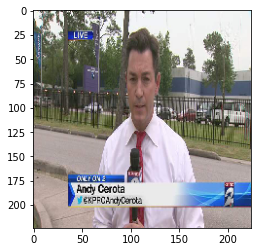

In [95]:
img = image.load_img(img, target_size=(224, 224,3))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
pre = model.predict(img)
print(pre)
class_name = ['impropermask','proper mask','no_mask']
class_name[np.argmax(pre)]

In [97]:
test_genrator = test_datagen.flow_from_directory(
    validate_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical',
    #subset='validation',
    
)

Found 6592 images belonging to 3 classes.


In [99]:
model.evaluate(test_genrator)

330/330 [==============================] - 91s 277ms/step - loss: 0.1575 - acc: 0.9372


[0.15748372673988342, 0.9371966123580933]